## 平面ラプラスノイズを任意の座標に付与する
ここでは参考論文の手法を簡略化して，平面ラプラス分布を離散化して座標の各成分ごとに付与を行う．

In [1]:
# モジュールをインポートする
import numpy as np
from scipy.special import lambertw as LW
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

今回はランダムに生成されたノイズを付与したにどの程度のバラつきが生じるのかを観察するためにN数を確保したい．

In [2]:
# 使用する変数の定義

# 描画する点の数を指定する
Num = 10000

# ノイズを付与した座標の値を格納するためのリストの定義
zx_list = []
zy_list = []

# 実際の位置の定義
real_x = 5.0
real_y = 3.0

# epsilonの定義
epsilon = 0.2
#epsilon = 22.6
# 正規化係数C
C = epsilon**2 / ( 2 * np.pi)

In [3]:
# 平面ラプラスノイズを座標に付与する

theta = np.random.uniform(0, 2*np.pi, Num)
p = np.random.uniform(0, 1, Num)
W = LW( ((p-1) / np.e), k=-1)
r = ( -1 / epsilon ) * ( W + 1 )
z_x = real_x + r * np.cos(theta)
z_y = real_y + r * np.sin(theta)

zx_list.append(np.array(z_x))
zy_list.append(np.array(z_y))

/Users/yu-akira/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


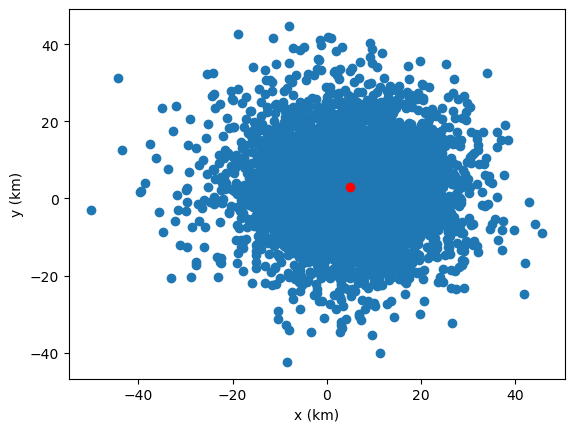

In [4]:
# 散布図としてノイズを付与した座標を出力する
fig, ax = plt.subplots()
plt.scatter(zx_list, zy_list)
# 実際の位置を赤く表示
plt.scatter(real_x, real_y, color="red")
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
plt.savefig("scatter_Laplacian.jpg", dpi=120)
plt.show()

この散布図を利用して，出力される座標を少数第2位を四捨五入し，小数点一桁で丸めたものをヒストグラムとして表示してみる

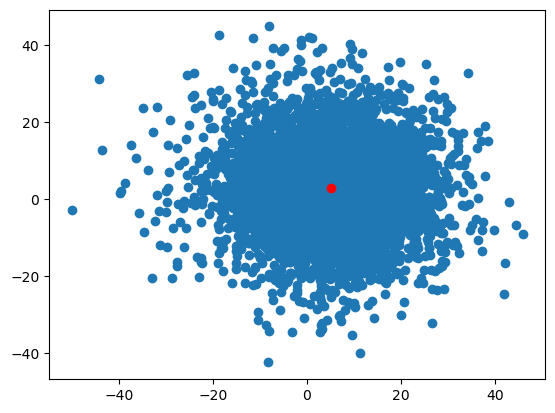

In [5]:
zx_ = np.round(zx_list, decimals=2)
zy_ = np.round(zy_list, decimals=2)
plt.scatter(zx_, zy_)
plt.scatter(real_x, real_y, color="red")
plt.show()

ヒストグラムとして出力する

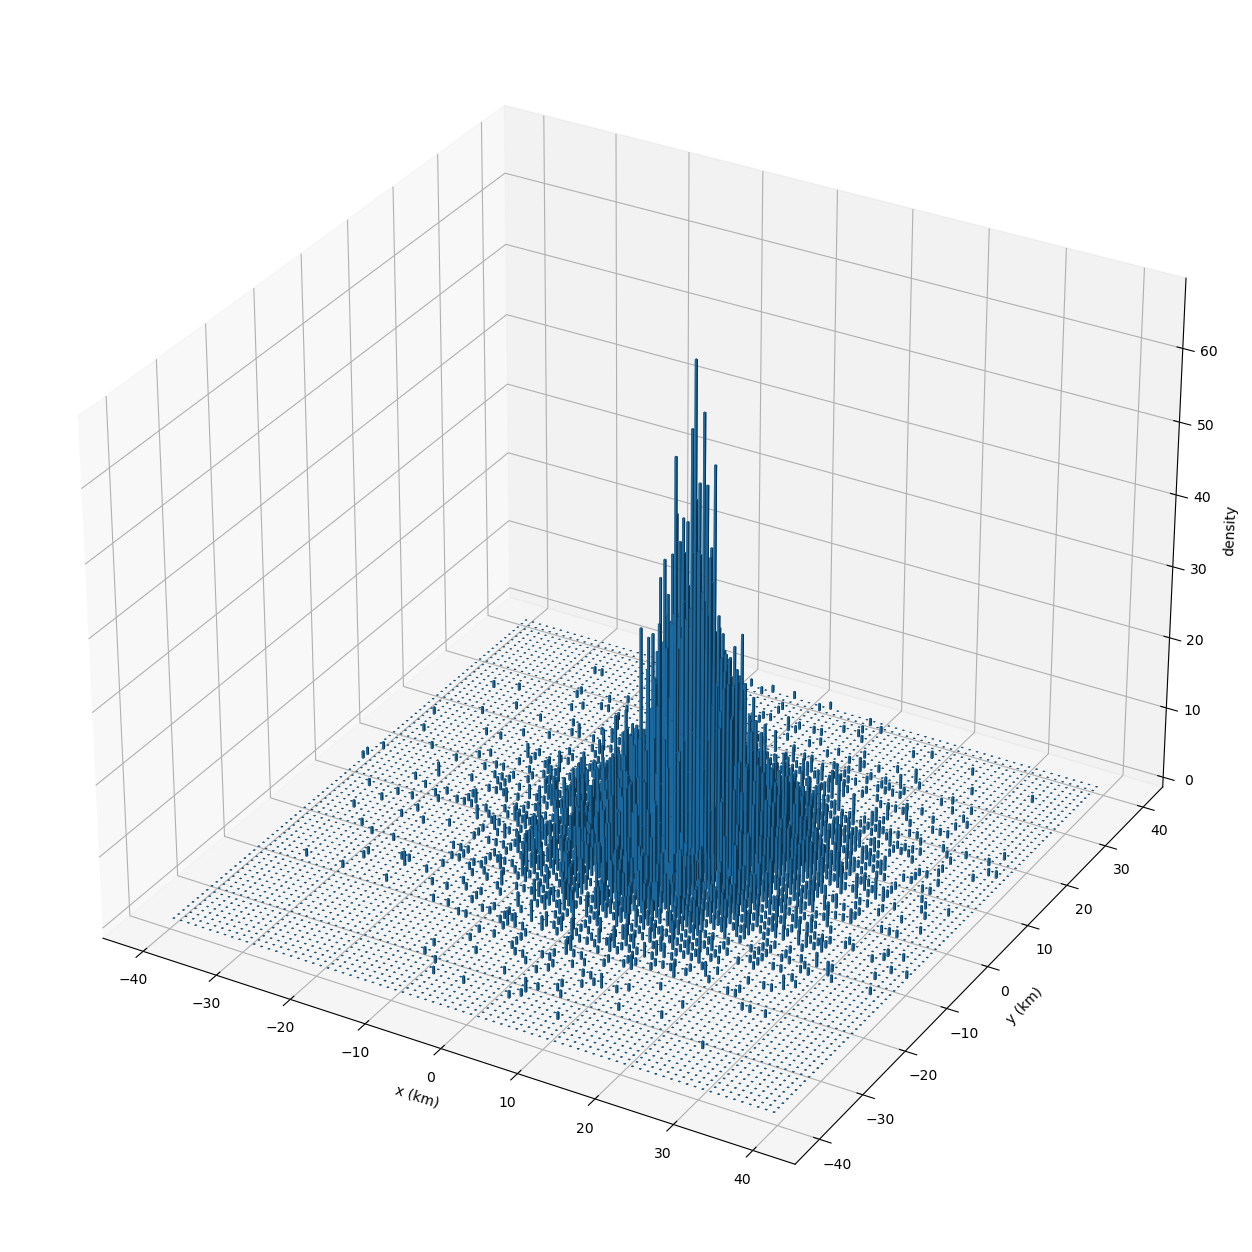

In [6]:
hist, xedges, yedges = np.histogram2d(zx_[0], zy_[0], bins=80, range=[[-40, 40], [-40, 40]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.25
dz = hist.ravel()

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection="3d")
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_zlabel("density")
plt.savefig("3d_histogram_decimals0.jpg", dpi=120)
plt.show()

実際の位置を中心にラプラス分布にしたがって値が出力されていることが確認できる．